Machine Learning Project
-----------
Classification and prediction of Common Thorax Diseases.
Chest X-ray dataset comprises 112,120 frontal view X-ray images of 30,805 unique patients with the text mined fourteen disease image labels (where each image can have multi labels), mined from the associated radiological reports using natural language processing. Fourteen common thoracic pathologies include Atelectasis, Consolidation, Infiltration, Pneumothorax, Edema, Emphysema, Fibrosis, Effusion, Pneumonia, Pleural_thickening, Cardiomegaly, Nodule, Mass and Hernia, which is an extension of the 8 common disease patterns listed in CVPR 2017 paper.

In [2]:
#All imports neccesary for the preprocessing of the data
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
#Root directory path containing all the files
rootPath = 'C:/Users/PRAVEEN NAIK/Desktop/HackerRank-Deeplearning/'
train_pathFold = './dl2_trimages/'
test_pathFold = './dl2_teimage/'
csv_trainPath = 'input/'
#Training data
train = pd.read_csv(rootPath+csv_trainPath+'train.csv')
#Testing data
test = pd.read_csv(rootPath+csv_trainPath+'test.csv')

In [4]:
train.head()

,row_id,age,gender,view_position,image_name,detected
0,id_0,45,M,0,scan_0000.png,class_3
1,id_1,57,F,0,scan_0001.png,class_3
2,id_10,58,M,0,scan_00010.png,class_3
3,id_1000,64,M,0,scan_0001000.png,class_6
4,id_10000,33,M,1,scan_00010000.png,class_3


In [5]:
print ('The train data has {} images.'.format(train.shape[0]))
print ('The test data has {} images.'.format(test.shape[0]))

The train data has 5999 images.
The test data has 3599 images.


In [6]:
#Number of classes in the dataset
print ('The train data has {} unique classes'.format(train['detected'].nunique()))

The train data has 14 unique classes


The train and test data consist of a large number of images. Working on these images is graphically intensive, so it is recommended to either work on a powerful system or work in the cloud.

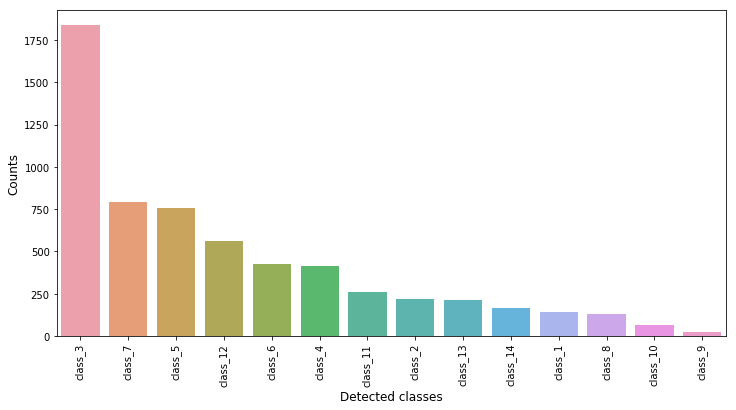

In [7]:
#Frequency distribution of the data versus class
detected_counts = train.detected.value_counts()
plt.figure(figsize = (12,6))
sns.barplot(detected_counts.index, detected_counts.values, alpha = 0.9)
plt.xticks(rotation = 'vertical')
plt.xlabel('Detected classes', fontsize =12)
plt.ylabel('Counts', fontsize = 12)
plt.show()

class_3 has the highest occurence followed by class_7. In comparision class_9 has the least number.

In [8]:
import cv2 as cv

In [9]:
#Testing a sample picture
img = cv.imread(rootPath+train_pathFold + 'scan_0001.png')

In [10]:
img.shape

(1024, 1024, 3)

Unlike humans, a computer cannot recognise an image as it is. The computer cannot see shapes or colors. To a computer, any image is read as an array of numbers.

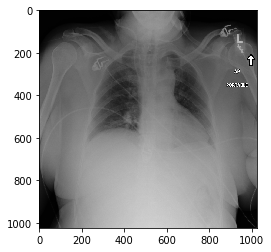

In [11]:
plt.imshow(img)

In [12]:
img

array([[[ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[ 1,  1,  1],
        [ 2,  2,  2],
        [ 2,  2,  2],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 1,  1,  1]],

       [[ 1,  1,  1],
        [ 2,  2,  2],
        [ 2,  2,  2],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 1,  1,  1]],

       ...,

       [[ 1,  1,  1],
        [ 2,  2,  2],
        [ 2,  2,  2],
        ...,
        [23, 23, 23],
        [14, 14, 14],
        [ 6,  6,  6]],

       [[ 1,  1,  1],
        [ 2,  2,  2],
        [ 2,  2,  2],
        ...,
        [36, 36, 36],
        [30, 30, 30],
        [12, 12, 12]],

       [[ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1],
        ...,
        [17, 17, 17],
        [20, 20, 20],
        [ 9,  9,  9]]], dtype=uint8)

It sees it as a 1024x1024x3 array where the first two numbers represent the number of rows of pixels and the number of columns of pixels. 3 represents the RGB color spectrum. Each number in the array represents a single pixel.

While we can load all the images in the same way, processing 18000 images of size 1024x1024 require enormous computation power. Instead, we resize them to more appropriate sizes.

VGG16 consists of 16 layer deep neural network weights. the model expects images as input with the size 224 x 224 pixels with 3 channels (e.g. color) for best modelling.

In [13]:
#setting the Target size or resizing images
targetSize = 224 , 224

In [14]:
#Function to import one image
def read_img(img_path):
    img = cv.imread(img_path)
    img = cv.resize(img, targetSize)
    return img

In [15]:
from tqdm import tqdm

In [16]:
#Loading the Training dataset
train_img = []
for img_path in tqdm(train['image_name'].values):
    train_img.append(read_img( rootPath + train_pathFold + img_path))

100%|██████████████████████████████████████████████████████████████████████████████| 5999/5999 [01:28<00:00, 67.59it/s]


Preprocessing data
------------
The preprocessing of the input data to make it better fit our model.

The list of arrays which contain the data for all the training images. Next convert this list into a numpy array


In [17]:
XTrain_Original = np.array(train_img, np.float32) / 255

In [18]:
meanImg = np.mean(XTrain_Original,axis=0)

In [19]:
standardDevImg = np.std(XTrain_Original,axis=0)

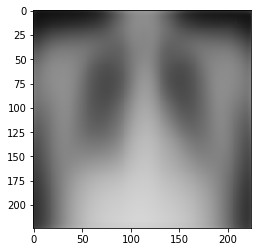

In [20]:
plt.imshow(meanImg)

The above image is the mean of all the training images. It is a good average representation of the entire training dataset.

It is not possible to view the entire 18000 images at once. Thus using the mean image to observe an average of the entire dataset. The mean image is calculated by taking the mean values for each pixel across all training examples. The image roughly represents the thorax. This image lets us conclude that all the thoraxes are somewhat aligned to the center and are of comparable size.


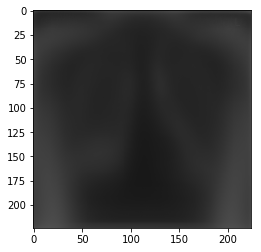

In [21]:
plt.imshow(standardDevImg)

The above image is the standard deviation of all images. High variance shows up whiter, so we see that the pictures vary a lot at the lungs compared to the rest of the image.

The reason we calculate both of these things is because in the process of training our network, we're going to be multiplying (weights) and adding to (biases) these initial inputs in order to cause activations that we then backpropogate with the gradients to train the model.
We'd like in this process for each feature to have a similar range so that our gradients don't go out of control (and that we only need one global learning rate multiplier).

While we can pass x_train as it is to our learning model, it is better to normalize it first. Normalizing both the train and test data for this problem can result in as much as a 12% increase in accuracy.

We normalize it using this formula: X = (x - mean of x) / standard deviation of x.

In [22]:
# XTarin(supposed to be XtrainNorm but convenience) is the normalised version of XTrain_Original.
XTrain = (XTrain_Original - meanImg) / standardDevImg

In [23]:
del XTrain_Original

Using numpy arrays we convert the images into an list of array of dimensions (N,224,224,3).Where N is the size of the dataset. On top of the VVG16 net altered, one dense layer and one output softmax layer with 14 tensors(Which is the number of classes).

In [24]:
XTrain.shape

(5999, 224, 224, 3)

Our final training data is an 18577x124x124x3 array. This mean that it is an array of 18577 images of size 124x124.

The target variable needs to be encoded as the model needs a array of numbers to train.

In [27]:
#Encoding the classes value into intergers for training
class_list = train['detected'].tolist()
YTrain = {k:v+1 for v,k in enumerate(set(class_list))}
YTrain = [YTrain[k] for k in class_list]

In [ ]:
#All imports for training the dataset
from keras import applications
from keras import optimizers
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Convolution2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

We use the keras module for this problem. Keras is a high-level API written in Python. It runs on top of Tensorflow, CNTK or Theano. It is relatively easy to use and is very fast.

In [ ]:
#Ytrain for the model
YTrain = to_categorical(YTrain)

Modeling
----
The most important part of a Deep learning problem is to choose the appropriate training model. While choosing a model, we have two options:
>1. Transfer learning: Where you transfer a pre-built model and weights and fit it to your model.
>2. Create your own model: Here you create your own model from scratch and train its weights. This gives you better control over your model.
We have adapted transfer learning model.

A Deep learning model consists of a number of layers connected to each other. The input data is passed through each layer, one-by-one. We used VGG16 with 16 layers of deep network.

In [ ]:
base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

In [ ]:
add_model = Sequential()
add_model.add(Flatten(input_shape=base_model.output_shape[1:]))
add_model.add(Dense(256, activation='relu'))
add_model.add(Dense(y_train.shape[1], activation='softmax'))

model = Model(inputs=base_model.input, outputs=add_model(base_model.output))
model.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

In [ ]:
early_stops = EarlyStopping(patience=3, monitor='val_acc')


We define an early stopping condition for the model. If the val_acc is the same three times, the model stops.

We now train this model using the input data. An epoch is when the model runs through the entire data once. batch_size is the size by which our input data is split. validation_split splits our data into 70% training and 30% validation. The below code splits the input data into batches of 100 images and runs them through the model 150 times.

In [ ]:
model.summary()

In [ ]:
batch_size = 100 # Tune it based on GPU memory
epochs = 150 # increase it lb:0.40856(150 epochs(max)), 0.27101 (5 epochs) to avoid overfitting

train_datagen = ImageDataGenerator(
        rotation_range=30, 
        width_shift_range=0.1,
        height_shift_range=0.1, 
        horizontal_flip=False)
train_datagen.fit(XTrain)

In [ ]:
history = model.fit_generator(
    train_datagen.flow(XTrain, YTrain, batch_size=batch_size),
    steps_per_epoch= XTrain.shape[0] // batch_size,
    epochs=epochs
)

In [ ]:
del XTrain

Prediction
----
Now that we have built and trained our model, it is time to precit the test data.

In [ ]:
test_img = []
for img_name in tqdm(test['image_name'].values):
    test_img.append(read_img(TEST_PATH + img_name))

XTest = np.array(test_img, np.float32) / 255.
del test_img

We import the test data and pass it to an array.

In [ ]:
XTest = (XTest - mean_img) / std_img

In [ ]:
predictions = model.predict(XTest)

In [ ]:
# get labels
predictions = np.argmax(predictions, axis=1)
rev_y = {v:k for k,v in label_numeric.items()}
pred_labels = [rev_y[k] for k in predictions]

Creating results document
-----
Using the predictions to create a CSV file containing the prediction values.

In [ ]:
sub = pd.DataFrame({'row_id':test.row_id, 'Actual':test.actual,'Detected':pred_labels})
sub = sub[['row_id','Actual','Detected']]
filename = rootPath+'CM.csv'
sub.to_csv(filename, index=False)

In [35]:
import csv
import itertools
from sklearn.metrics import confusion_matrix
from pandas_confusion import ConfusionMatrix

Importing the stored csv file to analyze the results.

In [36]:
file = open("C:/Users/PRAVEEN NAIK/Desktop/HackerRank-Deeplearning/CM.csv","r")
reader = csv.reader(file)

Classification Accuracy and its Limitations
-----
*Classification accuracy = Correct predictions / Total predictions * 100 *

*Error rate = (1 - (Correct predictions / Total predictions)) * 100 *

In [37]:
count=0
actual=[]
predicted=[]
for column in reader:
    t = column[1], column[2]
    actual.append(column[1])
    predicted.append(column[2])
    if(column[1]==column[2]):
        count+=1
        #print(t)
print("Accuracy : ",(count/1000)*100,"%")
print("Error rate : ",(1-(count/1000))*100,"%")
cfm = confusion_matrix(actual[1:],predicted[1:])

Accuracy :  93.7 %
Error rate :  6.2999999999999945 %


In [38]:
classLabel = ["Effusion", "Fibrosis", "Infiltration", "Edema", "Consolidation", "Emphysema", "Atelectasis", "Pleural_Thickening", "Nodule", "Hernia", "Mass", "Pneumothorax", "Pneumonia", "Cardiomegaly"]
sortedClassLabel = ["Fibrosis","Pneumonia","Consolidation","Nodule","Pleural_Thickening","Emphysema","Cardiomegaly","Infiltration","Mass","Effusion","Pneumothorax","Atelectasis","Edema","Hernia"]

Confusion Matrix
------
A confusion matrix is a summary of prediction results on a classification problem.
The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix.

Ploting the confusion matrix using Seaborn extension

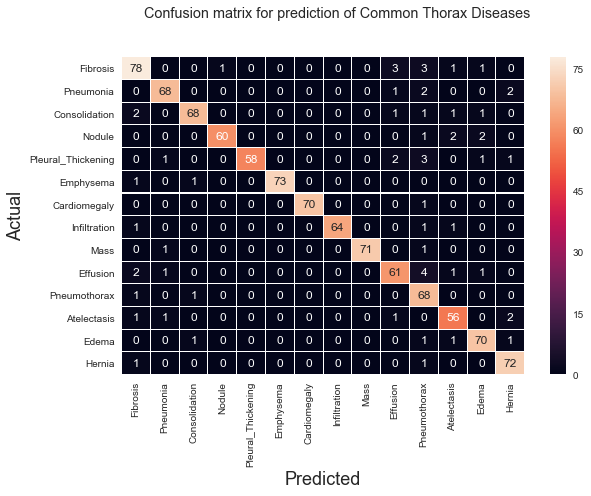

In [54]:
plt.figure(figsize = (10,7))
df_cm = pd.DataFrame(cfm, sortedClassLabel,sortedClassLabel)
sns.set(font_scale=1)
img = sns.heatmap(df_cm, annot=True,fmt="d",linewidths=.05)
plt.suptitle("Confusion matrix for prediction of Common Thorax Diseases")
plt.ylabel('Actual', fontsize=18)
plt.xlabel('Predicted', fontsize=18)
plt.subplots_adjust(left=0.2, bottom=0.25)
plt.savefig('confusion_matrix.png')

**End**

* *** *